In [1]:
# Import thư viện
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
now = datetime.now()
print(now)
print(now.year)
print(now.month)
print(now.day)

2020-04-04 14:43:57.592862
2020
4
4


In [3]:
#Khoảng cách thời gian 
delta = datetime(2020, 1, 9,2,30) - datetime(2020, 1, 7)
print(delta)
print(delta.days)
print(delta.seconds) # khoảng cách giây giữa 2:30:00 - 0:0:0 -> 9000 giây

2 days, 2:30:00
2
9000


In [36]:
# Convert timestamp to real time and ngược lại

timestamp = 1475806416 #1529272655
real_t = pd.to_datetime(timestamp, unit='s')
print(real_t)


ts = pd.datetime.timestamp(real_t) 
print(ts) 



2016-10-07 02:13:36
1475781216.0


In [19]:
xlsx = pd.ExcelFile('movies.xlsx')
tags = pd.read_excel(xlsx, 'tags')
movies = pd.read_excel(xlsx, 'movies')
ratings = pd.read_excel(xlsx, 'ratings')
print(tags.shape, type(tags))
print(tags.dtypes)

(1296, 4) <class 'pandas.core.frame.DataFrame'>
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [6]:
# Lấy 5 dòng đầu của tags
tags_sub = tags.head(5)
print(tags_sub)

   userId  movieId                      tag   timestamp
0      15      339  sandra 'boring' bullock  1138537770
1      15     1955                  dentist  1193435061
2      15     7478                 Cambodia  1170560997
3      15    32892                  Russian  1170626366
4      15    34162              forgettable  1141391765


In [25]:
# doi thoi gian , timestamp -> parsed_time
tags_sub = tags_sub.copy()
tags_sub['parsed_time'] = pd.to_datetime(tags_sub['timestamp'], unit='s')
print(tags_sub)

   userId  movieId                      tag   timestamp         parsed_time
0      15      339  sandra 'boring' bullock  1138537770 2006-01-29 12:29:30
4      15    34162              forgettable  1141391765 2006-03-03 13:16:05
2      15     7478                 Cambodia  1170560997 2007-02-04 03:49:57
3      15    32892                  Russian  1170626366 2007-02-04 21:59:26
1      15     1955                  dentist  1193435061 2007-10-26 21:44:21


In [8]:
year_t = tags_sub['parsed_time'] > '2007-01-01'
print(year_t)
selected_rows = tags_sub[year_t]
print(selected_rows)

0    False
1     True
2     True
3     True
4    False
Name: parsed_time, dtype: bool
   userId  movieId       tag   timestamp         parsed_time
1      15     1955   dentist  1193435061 2007-10-26 21:44:21
2      15     7478  Cambodia  1170560997 2007-02-04 03:49:57
3      15    32892   Russian  1170626366 2007-02-04 21:59:26


In [9]:
tags_sub = tags_sub.sort_values(by='parsed_time', ascending=True)
print(tags_sub)

   userId  movieId                      tag   timestamp         parsed_time
0      15      339  sandra 'boring' bullock  1138537770 2006-01-29 12:29:30
4      15    34162              forgettable  1141391765 2006-03-03 13:16:05
2      15     7478                 Cambodia  1170560997 2007-02-04 03:49:57
3      15    32892                  Russian  1170626366 2007-02-04 21:59:26
1      15     1955                  dentist  1193435061 2007-10-26 21:44:21


In [10]:
# Phát sinh dữ liệu khoảng cách datetime -> hàm date_range

#dates = pd.date_range('1/1/2020', periods=100, freq='W-MON') # bắt đầu '1/1/2020', phát sinh theo tuần, 100 dòng, Thứ 2 là bắt đầu 1 tuần
dates = pd.date_range('1/1/2020', periods=100, freq='Q-JAN') # bắt đầu '1/1/2020', phát sinh theo Quý, 100 dòng, Tháng 1 là bắt đầu 1 quý

long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2020-01-31,-2.231357,0.119487,-0.091826,0.014444
2020-04-30,-0.074840,-0.337235,0.747396,-0.307598
2020-07-31,-0.253606,-1.178705,0.006684,-2.272627
2020-10-31,-0.598587,-0.605511,-0.434648,-1.114842
2021-01-31,0.430482,0.281902,-0.047131,-0.435144
...,...,...,...,...
2043-10-31,0.398132,-0.300593,0.365389,-0.132315
2044-01-31,-1.042940,0.003915,2.149435,-0.037167
2044-04-30,0.985685,0.408878,-1.480896,0.451889
2044-07-31,-0.292912,1.970798,2.109095,-1.115300


In [11]:
#Resampling refers to the process of converting a time series from one frequency to another. 
#Aggregating higher frequency data to lower frequency is called downsampling, 
#while converting lower frequency to higher frequency is called upsampling

# downsampling from day - month
rng = pd.date_range('2020-01-01', periods=100, freq='D')
ts = pd.Series(np.random.rand(len(rng)), index=rng)
print(ts.head())
print(ts)
print(ts.resample('M').mean())

print(ts['2020-01-01':'2020-01-31'].mean())
# resample has a similar API to groupby; you call resample to group the data, then call an aggregation function

# upsampling from week to day

2020-01-01    0.979796
2020-01-02    0.494690
2020-01-03    0.459625
2020-01-04    0.690915
2020-01-05    0.875817
Freq: D, dtype: float64
2020-01-01    0.979796
2020-01-02    0.494690
2020-01-03    0.459625
2020-01-04    0.690915
2020-01-05    0.875817
                ...   
2020-04-05    0.265431
2020-04-06    0.813174
2020-04-07    0.968946
2020-04-08    0.697871
2020-04-09    0.171356
Freq: D, Length: 100, dtype: float64
2020-01-31    0.578624
2020-02-29    0.496577
2020-03-31    0.451267
2020-04-30    0.561864
Freq: M, dtype: float64
0.5786242341838959


In [38]:
movies_ratings = pd.merge(movies,ratings,on='movieId')
movies_ratings['date'] = pd.to_datetime(movies_ratings['timestamp'], unit='s')
movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1996-12-29 13:38:23
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,1999-09-29 18:19:39
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,2012-03-10 11:47:38
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,2001-08-16 05:05:10
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,1997-02-06 00:48:11


In [49]:
movies_ratings.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 0 to 100003
Data columns (total 7 columns):
movieId      100004 non-null int64
title        100004 non-null object
genres       100004 non-null object
userId       100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
date         100004 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 8.6+ MB


In [64]:
mv=movies_ratings[movies_ratings['movieId']==1][['rating','date']].set_index('date')

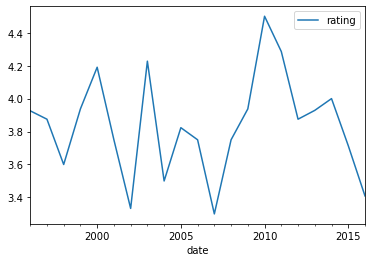

In [69]:
mv.resample('Y').mean().plot()